#  ============Diabetes_Prdection_Analysis============

# Importing Liabrary

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


#  1. Data Preparation

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
diabetes = pd.read_csv('diabetes.csv',names=col_names)
print(diabetes.columns)
#diabetes.describe().to_csv('describe.csv')

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'outcome'],
      dtype='object')


# 2 -  Data Exploration

In [3]:
diabetes.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


In [102]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


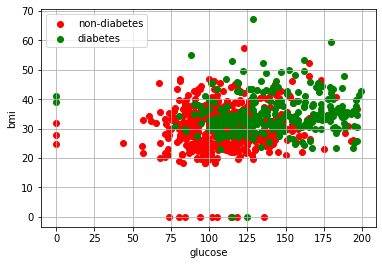

In [103]:
diabetic_negtive=diabetes[diabetes.outcome == 0]
diabetic_positive=diabetes[diabetes.outcome == 1]
plt.scatter(diabetic_negtive['glucose'],diabetic_negtive['bmi'],color='r')
plt.scatter(diabetic_positive['glucose'],diabetic_positive['bmi'],color='g')
plt.xlabel("glucose")
plt.ylabel("bmi")
plt.legend(('non-diabetes','diabetes'))
plt.grid()
plt.savefig('bmi_glucose.png')


## from above we can see red & green dots not linearly separable

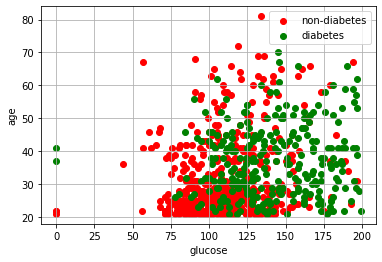

In [104]:
plt.scatter(diabetic_negtive['glucose'],diabetic_negtive['age'],color='r')
plt.scatter(diabetic_positive['glucose'],diabetic_positive['age'],color='g')
plt.xlabel("glucose")
plt.ylabel("age")
plt.legend(('non-diabetes','diabetes'))
plt.grid()
plt.savefig('glucose_age.png')

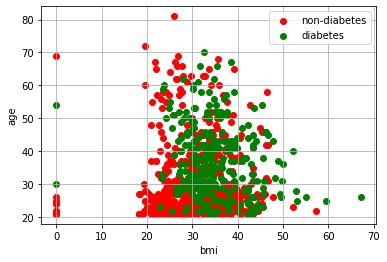

In [105]:
plt.scatter(diabetic_negtive['bmi'],diabetic_negtive['age'],color='r')
plt.scatter(diabetic_positive['bmi'],diabetic_positive['age'],color='g')
plt.xlabel("bmi")
plt.ylabel("age")
plt.legend(('non-diabetes','diabetes'))
plt.grid()
plt.savefig('age_bmi.png')

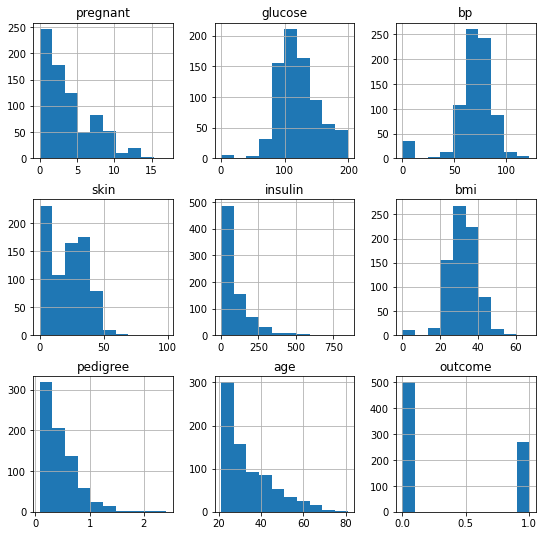

In [106]:
x=diabetes.hist(figsize=(9, 9))

outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

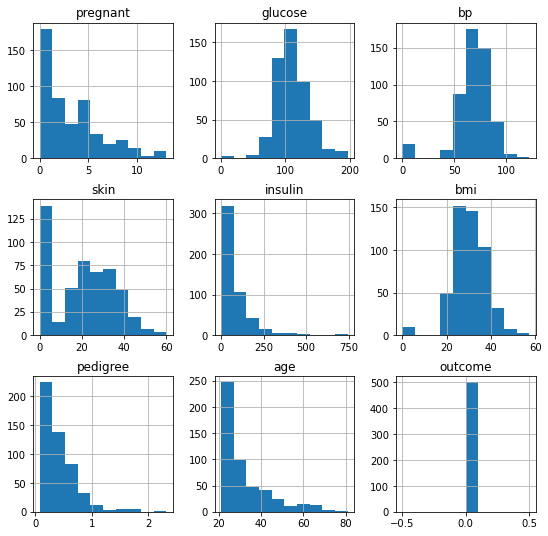

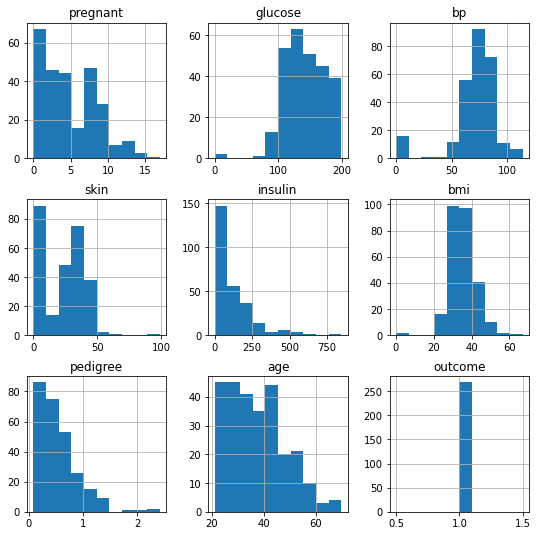

In [107]:
diabetes.groupby('outcome').hist(figsize=(9, 9))

# 3 - Data Cleaning


### a) Missing or Null Data points

In [108]:
diabetes.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
outcome     0
dtype: int64

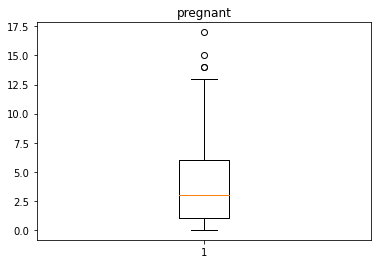

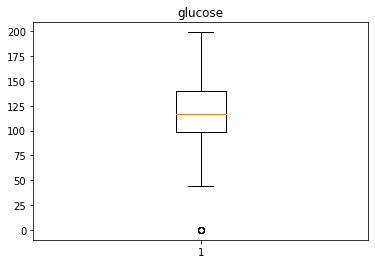

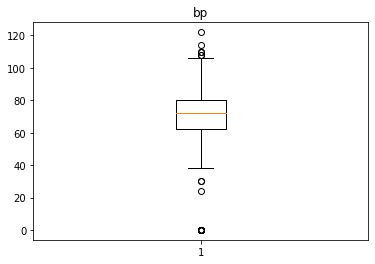

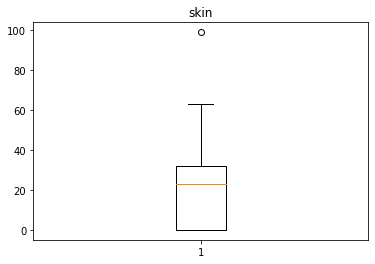

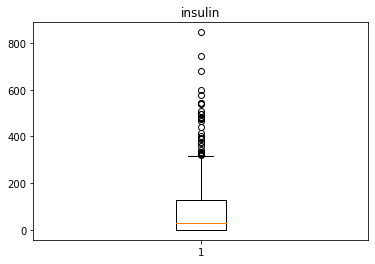

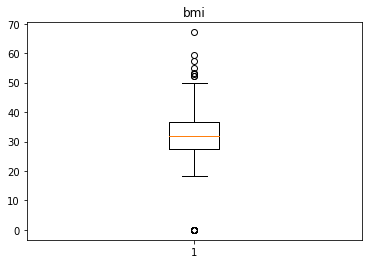

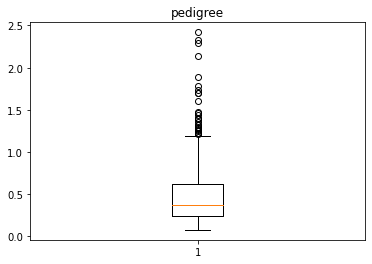

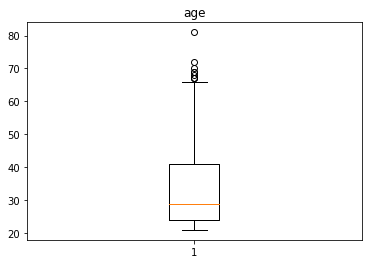

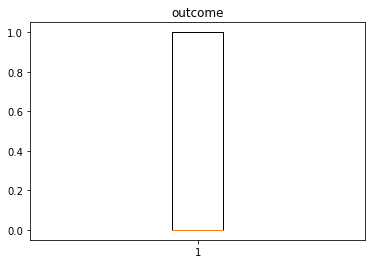

In [109]:
for i in diabetes.columns :
    plt.boxplot(diabetes[i])
    plt.title(i)
    plt.show()
    

In [110]:
diabetes.outcome.value_counts()

0    500
1    268
Name: outcome, dtype: int64

### b) Unexpected Outliers

####                 --Glucose:

In [111]:
print("Total : ", diabetes[diabetes.glucose == 0].shape[0])
print(diabetes[diabetes.glucose == 0].groupby('outcome')['age'].count())

Total :  5
outcome
0    3
1    2
Name: age, dtype: int64


####        --BloodPressure

In [112]:
print("Total : ", diabetes[diabetes.bp == 0].shape[0])
print(diabetes[diabetes.bp == 0].groupby('outcome')['age'].count())

Total :  35
outcome
0    19
1    16
Name: age, dtype: int64


####        --SkinThickness

In [113]:

print("Total : ", diabetes[diabetes.skin == 0].shape[0])
print(diabetes[diabetes.skin == 0].groupby('outcome')['age'].count())

Total :  227
outcome
0    139
1     88
Name: age, dtype: int64


####        --BMI

In [114]:
print("Total : ", diabetes[diabetes.bmi == 0].shape[0])
print(diabetes[diabetes.bmi == 0].groupby('outcome')['age'].count())

Total :  11
outcome
0    9
1    2
Name: age, dtype: int64


####        --Insulin

In [115]:
print("Total : ", diabetes[diabetes.insulin == 0].shape[0])
print(diabetes[diabetes.insulin == 0].groupby('outcome')['age'].count())

Total :  374
outcome
0    236
1    138
Name: age, dtype: int64


In [116]:
diabetes_mod = diabetes[(diabetes.bp != 0) & (diabetes.bmi != 0) & (diabetes.glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [117]:
for value in ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']:
    print (value,":", sum(diabetes[value] == 0))
    

pregnant : 111
glucose : 5
bp : 35
skin : 227
insulin : 374
bmi : 11
pedigree : 0
age : 0


## 3- Feature engineering

In [118]:
feature_names=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = diabetes[feature_names]
y = diabetes.outcome

# 4 - Model Selection

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



In [120]:
####Current default is ‘auto’ which uses 1 / n_features, if gamma='scale' is passed then it uses 1 / (n_features * X.var()) as value of gamma. The current default of gamma, ‘auto’, will change to ‘scale’ in version 0.22. ‘auto_deprecated’, a deprecated version of ‘auto’ is used as a default indicating that no explicit value of gamma was passed.

### - a)Train/Test split

In [121]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes.outcome, random_state=0)

### Feature Scaling

In [122]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#sc = StandardScaler()
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
model=XGBClassifier(learning_rate=0.1,subsample = 0.8,n_estimators=100,max_depth=4,gamma=0 ,use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
#print (y_pred)

[19:00:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       107
           1       0.68      0.72      0.70        47

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.82      0.81      0.81       154



In [124]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('SVC', SVC(gamma=.2,kernel='rbf' )))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
#models.append(('ADB', AdaBoostClassifier(n_estimators=100,learning_rate=1)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=10)))


In [125]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
tr_split.to_csv('withoutliers.csv')

[19:00:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  Name     Score
0  KNN  0.792208
1  SVC  0.831169
2   LR  0.818182
3   DT  0.740260
4  GNB  0.792208
5   RF  0.805195
6   GB  0.805195
7  XGB  0.785714


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


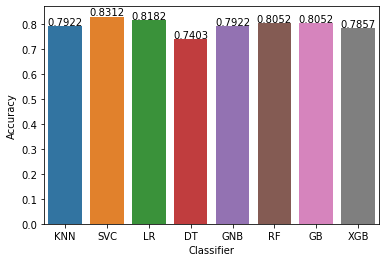

<Figure size 432x288 with 0 Axes>

In [126]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()
plt.savefig('xx1.png')

### Replacing '0' values into mean value

In [127]:
diabetes[['glucose', 'bp', 'skin', 'insulin', 'bmi']] = diabetes[['glucose', 'bp', 'skin', 'insulin', 'bmi']]
print(diabetes.isnull().sum())
diabetes.head()


pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
outcome     0
dtype: int64


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
diabetes.fillna(diabetes.mean(), inplace=True)
#diabetes.isnull().sum()
diabetes.head()
#diabetes.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [129]:
feature_names=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = diabetes[feature_names]
y = diabetes.outcome

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
print(X_train)

[[0.41176471 0.75757576 0.63934426 ... 0.52459016 0.26216909 0.55      ]
 [0.23529412 0.48989899 0.49180328 ... 0.42026826 0.1558497  0.01666667]
 [0.         0.83333333 0.73770492 ... 0.77943368 0.14901793 0.03333333]
 ...
 [0.23529412 0.47474747 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.64705882 0.42929293 0.60655738 ... 0.4485842  0.09479078 0.23333333]
 [0.29411765 0.68686869 0.67213115 ... 0.         0.23996584 0.8       ]]


In [132]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
#models.append(('ADB', AdaBoostClassifier(n_estimators=20,learning_rate=1,random_state=0)))
models.append(('GB', GradientBoostingClassifier(n_estimators=50, learning_rate=.1, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.7,objective='binary:logistic',n_estimators=20,max_depth=4,gamma=0)))
#models.append(('XGB',  XGBClassifier(objective='binary:logistic', gamma= 4, learning_rate=  0.15, max_depth= 1,n_estimators=60 ,subsample= 0.1)))
#'gamma': 4, 'learning_rate': 0.15000000000000002, 'max_depth': 1, 'n_estimators': 60, 'objective': 'binary:logistic', 'subsample': 0.1
#models.append(('XGB',  XGBClassifier(learning_rate=0.1,objective='binary:logistic',alpha= 0,colsample_bytree= 0.9, eta= 0.17500000000000002, gamma= 0.8500000000000001,reg_lambda= 1.9000000000000001, max_depth= 4, min_child_weight=2.0, n_estimators= 587, subsample= 0.8500000000000001)))

In [133]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
#tr_split.to_csv('after cleaning.csv')

[19:01:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  Name     Score
0  KNN  0.792208
1  SVC  0.831169
2   LR  0.818182
3   DT  0.740260
4  GNB  0.792208
5   RF  0.818182
6   GB  0.818182
7  XGB  0.798701


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [135]:
print(scores)

[0.7922077922077922, 0.8311688311688312, 0.8181818181818182, 0.7402597402597403, 0.7922077922077922, 0.8181818181818182, 0.8181818181818182, 0.7987012987012987]


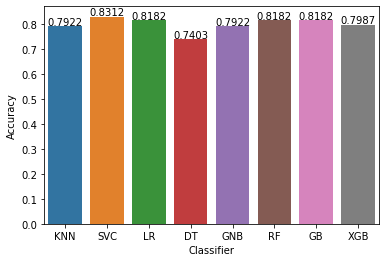

In [137]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

### Applying PCA without scaling through standazation(Z score normalization)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [139]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=10)))

In [140]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)



[19:02:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  Name     Score
0  KNN  0.785714
1  SVC  0.694805
2   LR  0.753247
3   DT  0.707792
4  GNB  0.766234
5   RF  0.714286
6   GB  0.766234
7  XGB  0.759740


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


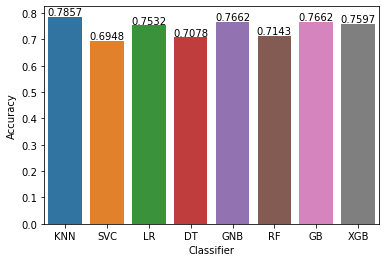

In [141]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

### PCA with Feature Scaling through standazation(Z score normalization)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [143]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=10)))

names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
tr_split.to_csv('PCAreasult.csv')

[19:02:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  Name     Score
0  KNN  0.733766
1  SVC  0.779221
2   LR  0.740260
3   DT  0.746753
4  GNB  0.746753
5   RF  0.740260
6   GB  0.727273
7  XGB  0.727273


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


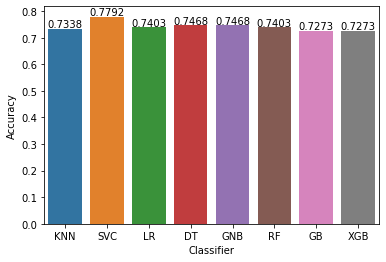

In [144]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

### parameter tuning

In [145]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB',  XGBClassifier()))

In [146]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
#print(tr_split)
tr_split.to_csv('withoutparameter.csv')


[19:02:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


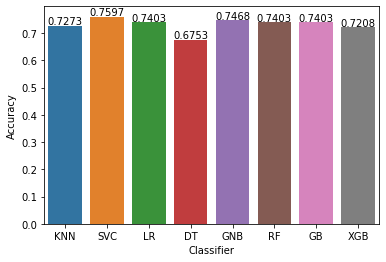

In [147]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [148]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('DT', DecisionTreeClassifier(criterion='gini',max_depth=3)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=50)))
models.append(('GB', GradientBoostingClassifier(n_estimators=50, learning_rate=.1, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=10)))


In [149]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

[19:02:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  Name     Score
0  KNN  0.727273
1  SVC  0.779221
2   LR  0.740260
3   DT  0.707792
4  GNB  0.746753
5   RF  0.733766
6   GB  0.727273
7  XGB  0.727273


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


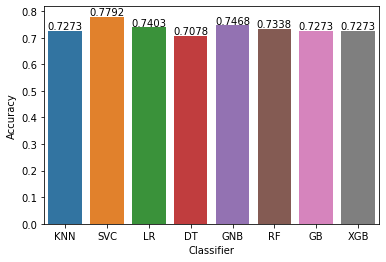

In [150]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
#models.append(('SVC', SVC(probability=True)))
models.append(('SVC', SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = .8,objective='binary:logistic',n_estimators=100,max_depth=5,gamma=1)))

In [152]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

[19:02:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  Name     Score
0  KNN  0.805195
1  SVC  0.792208
2   LR  0.824675
3   DT  0.733766
4  GNB  0.792208
5   RF  0.798701
6   GB  0.805195
7  XGB  0.831169


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


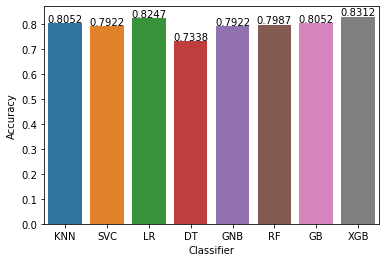

In [153]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

KNN


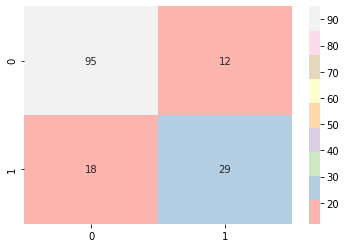

SVC


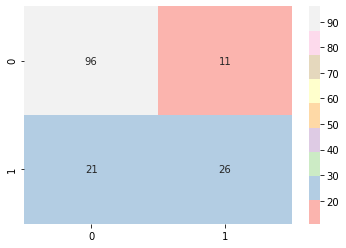

LR


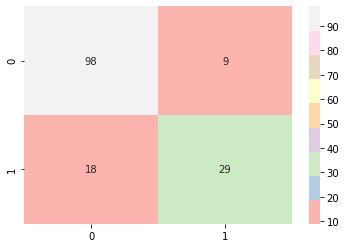

DT


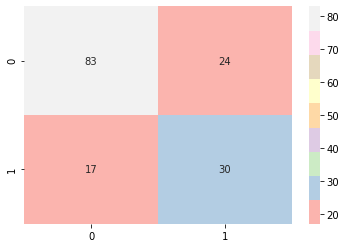

GNB


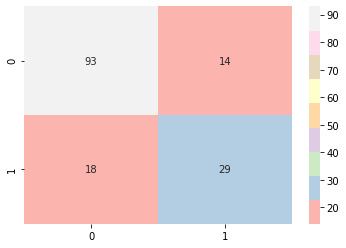

RF


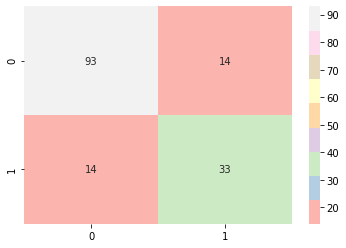

GB


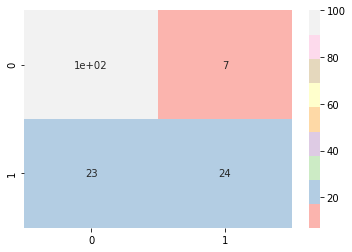

[19:02:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB


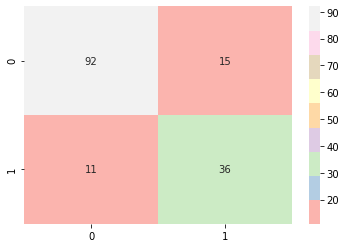

In [154]:
import seaborn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    seaborn.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Pastel1')
    print(name)
    plt.show()


In [155]:
from sklearn import metrics
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(model.predict(X_train),y_train,drop_intermediate=False)
names = []
AUC_score = []
precision=[]
Recall=[]
Accuracy=[]
F1_score=[]
Matthews_corrcoef=[]
specificity=[]
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    Accuracy.append(accuracy_score(y_test, y_pred))
    Recall.append(metrics.recall_score(y_test, y_pred))
    precision.append(metrics.precision_score(y_test, y_pred))
    AUC_score.append(roc_auc_score(y_test, y_pred))
    F1_score.append(f1_score(y_test,y_pred))
    Matthews_corrcoef.append(matthews_corrcoef(y_test,y_pred))
    specificity.append(TN / (TN + FP))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'precision': precision,'Sensitivity':Recall,'F1 score':F1_score,'AUC score':AUC_score,'Accuracy':Accuracy,'Matthews corrcoef':Matthews_corrcoef,'specificity':specificity})
#print(tr_split)
tr_split.to_csv('result1.csv')


[19:02:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


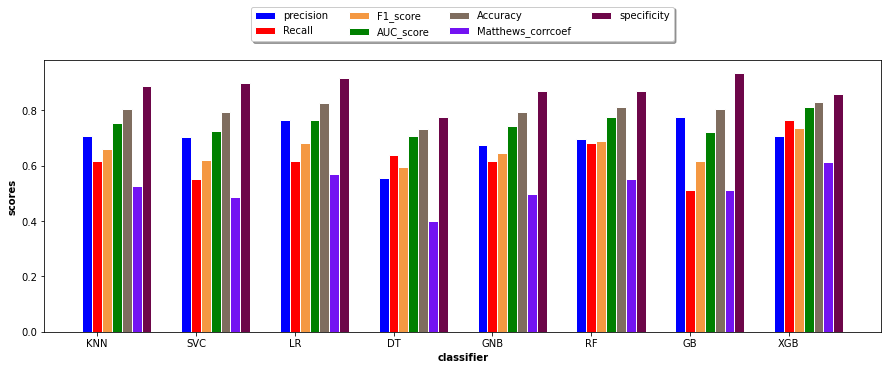

In [156]:
barWidth = 0.1

r1 = np.arange(len(precision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 
# Make the plot
plt.subplots(figsize=(15,5))
plt.bar(r1, precision, color='blue', width=barWidth, edgecolor='white', label='precision')
plt.bar(r2, Recall, color='red', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, F1_score, color='#f49842', width=barWidth, edgecolor='white', label='F1_score')
plt.bar(r4, AUC_score, color='green', width=barWidth, edgecolor='white', label='AUC_score')
plt.bar(r5, Accuracy, color='#7f6d5f', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r6, Matthews_corrcoef, color='#7313f2', width=barWidth, edgecolor='white', label='Matthews_corrcoef')
plt.bar(r7, specificity, color='#6d0649', width=barWidth, edgecolor='white', label='specificity')
# Add xticks on the middle of the group bars
plt.xlabel('classifier', fontweight='bold')
plt.ylabel('scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(precision))], ['KNN', 'SVC', 'LR', 'DT', 'GNB','RF','GB','XGB'])
 
# Create legend & Show graphic
plt.legend(loc='lower center',bbox_to_anchor=(0.5,1.05),ncol=4,fancybox=True,shadow=True)
plt.show()

In [157]:
from sklearn import metrics
names = []
TP=[]
TN=[]
FP=[]
FN=[]
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP.append(confusion[1, 1])
    TN.append(confusion[0, 0])
    FP.append(confusion[0, 1])
    FN.append(confusion[1, 0])
    
    names.append(name)

tr_split = pd.DataFrame({'Name': names,'TP': TP,'TN': TN,'FP': FP,'FN': FN})
print(tr_split)
#tr_split.to_csv('confusionmatrix1.csv')

[19:03:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  Name  TP   TN  FP  FN
0  KNN  29   95  12  18
1  SVC  26   96  11  21
2   LR  29   98   9  18
3   DT  30   83  24  17
4  GNB  29   93  14  18
5   RF  33   94  13  14
6   GB  24  100   7  23
7  XGB  36   92  15  11


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [158]:
#from sklearn import metrics
#confusion = metrics.confusion_matrix(y_test, y_pred)
#print(confusion)
#[row, column]
speficity=[]
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    #print(name)
    speficity.append(TN / (TN + FP))
tr_split = pd.DataFrame({'Name': names,'speficity': speficity})
print(tr_split)

[19:03:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  Name  speficity
0  KNN   0.887850
1  SVC   0.897196
2   LR   0.915888
3   DT   0.775701
4  GNB   0.869159
5   RF   0.869159
6   GB   0.934579
7  XGB   0.859813


C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [159]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.8311688311688312
0.8311688311688312


### Classification Error:"Misclassification Rate"

In [160]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.16883116883116883
0.16883116883116878


### Specificity: TN / (TN + FP)

In [161]:
specificity = TN / (TN + FP)

print(specificity)

0.8598130841121495


### False Positive Rate:

In [162]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.14018691588785046
0.14018691588785048


### Precision:

In [163]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.7058823529411765
0.7058823529411765


In [164]:
model.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [165]:
model.predict_proba(X_test)[0:10]

array([[0.09214652, 0.9078535 ],
       [0.9204782 , 0.07952175],
       [0.978697  , 0.02130302],
       [0.18329549, 0.8167045 ],
       [0.9340757 , 0.06592427],
       [0.98991185, 0.01008812],
       [0.07907784, 0.92092216],
       [0.02537966, 0.97462034],
       [0.8352008 , 0.1647992 ],
       [0.5351024 , 0.46489757]], dtype=float32)

In [166]:
model.predict_proba(X_test)[0:10, 1]

array([0.9078535 , 0.07952175, 0.02130302, 0.8167045 , 0.06592427,
       0.01008812, 0.92092216, 0.97462034, 0.1647992 , 0.46489757],
      dtype=float32)

Text(0, 0.5, 'Frequency')

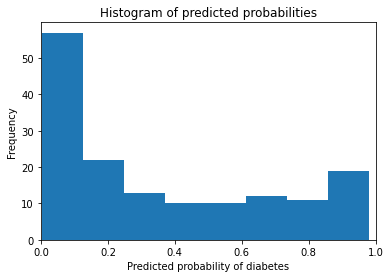

In [167]:

y_pred_prob = model.predict_proba(X_test)[:, 1]
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

KNN


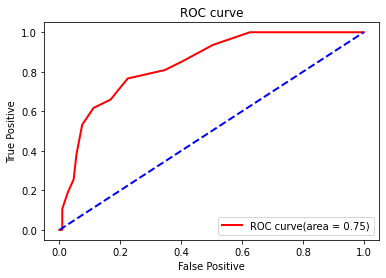

AttributeError: predict_proba is not available when  probability=False

In [168]:

for name,model in models:
    ##Adding the ROC
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    print(name)
    plt.plot(fpr, tpr,lw=2,color='red',label='ROC curve(area = %0.2f)' %(auc))
    ##Random FPR and TPR
# Now, plot the computed values
    plt.plot([0, 1], [0, 1], lw=2,color='blue',linestyle='--')
    ##Title and label
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

C:\Users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


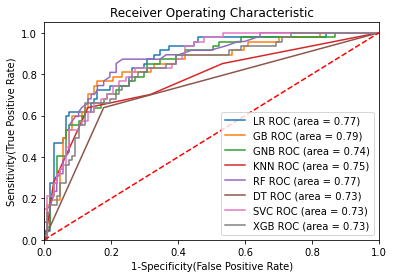

In [169]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn import metrics
#import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'LR',
    'model': LogisticRegression(),
},
{
    'label': 'GB',
    'model': GradientBoostingClassifier(),
},    
{
    'label': 'GNB',
    'model': GaussianNB(),
}, 
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),
},
{
    'label': 'RF',
    'model': RandomForestClassifier(),
},
{
    'label': 'DT',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'SVC',
    'model': SVC(probability=True),
},
{
    'label': 'XGB',
    'model':  XGBClassifier(),
},
]


# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### ROC curve

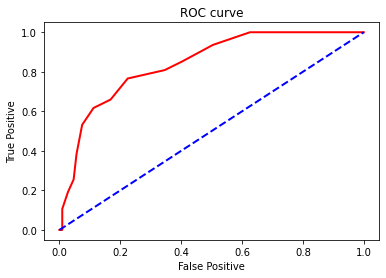

In [170]:

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
plt.show()

In [171]:
print(metrics.roc_auc_score(y_test, y_pred))

0.7316563929210578


### Deep learning(convolutional neural network (CNN)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from keras.models import Sequential
from keras.layers import Dense, Conv2D , Flatten
from keras import optimizers
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = StandardScaler()

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
# fix random seed for reproducibility
np.random.seed(7)
# create model
model = Sequential()
model.add(Dense(16, input_dim=8,activation='relu'))
model.add(Dense(64,  activation='relu')) # 100 neurons with tanh activation function
model.add(Dense(12, activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model

#sgd = optimizers.SGD(lr=0.01, nesterov=True)
#adam=optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer=sgd)
# Fit the model

x=model.fit(X_train, y_train, epochs=1000, batch_size=10,validation_data=(X_test, y_test))
#y_pred = model.predict(X_test)
# evaluate the model
score = model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Epoch 1/1000
58/58 [==============================] - 1s 3ms/step - loss: 1.0251 - accuracy: 0.6059 - val_loss: 0.6009 - val_accuracy: 0.7031
Epoch 2/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6424 - val_loss: 0.5996 - val_accuracy: 0.6979
Epoch 3/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6510 - val_loss: 0.5807 - val_accuracy: 0.7448
Epoch 4/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.6684 - val_loss: 0.5821 - val_accuracy: 0.7188
Epoch 5/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.6910 - val_loss: 0.5891 - val_accuracy: 0.7240
Epoch 6/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6892 - val_loss: 0.6285 - val_accuracy: 0.6875
Epoch 7/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6788 - val_loss: 0.5733 - val_accuracy: 0.7292
Epoch 

58/58 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8073 - val_loss: 0.5858 - val_accuracy: 0.7344
Epoch 116/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8090 - val_loss: 0.6276 - val_accuracy: 0.6927
Epoch 117/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.7865 - val_loss: 0.6569 - val_accuracy: 0.6615
Epoch 118/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.7951 - val_loss: 0.6078 - val_accuracy: 0.7292
Epoch 119/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7917 - val_loss: 0.5743 - val_accuracy: 0.7292
Epoch 120/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.7969 - val_loss: 0.6203 - val_accuracy: 0.6927
Epoch 121/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8212 - val_loss: 0.5989 - val_accuracy: 0.7240
Epoch 1

Epoch 172/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8299 - val_loss: 0.6603 - val_accuracy: 0.6615
Epoch 173/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8455 - val_loss: 0.6681 - val_accuracy: 0.7083
Epoch 174/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8264 - val_loss: 0.6804 - val_accuracy: 0.6979
Epoch 175/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8090 - val_loss: 0.6334 - val_accuracy: 0.6875
Epoch 176/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8194 - val_loss: 0.7032 - val_accuracy: 0.6719
Epoch 177/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8368 - val_loss: 0.6629 - val_accuracy: 0.6927
Epoch 178/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8663 - val_loss: 0.6139 - val_accuracy:

Epoch 229/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8715 - val_loss: 0.7606 - val_accuracy: 0.6771
Epoch 230/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8507 - val_loss: 0.7291 - val_accuracy: 0.6927
Epoch 231/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8611 - val_loss: 0.7276 - val_accuracy: 0.6875
Epoch 232/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8507 - val_loss: 0.7299 - val_accuracy: 0.6823
Epoch 233/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8663 - val_loss: 0.7358 - val_accuracy: 0.6875
Epoch 234/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8524 - val_loss: 0.7371 - val_accuracy: 0.7031
Epoch 235/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8490 - val_loss: 0.6728 - val_accuracy:

Epoch 286/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.8819 - val_loss: 0.7954 - val_accuracy: 0.6875
Epoch 287/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8802 - val_loss: 0.8301 - val_accuracy: 0.6875
Epoch 288/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.8906 - val_loss: 0.7916 - val_accuracy: 0.6823
Epoch 289/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.8663 - val_loss: 0.8323 - val_accuracy: 0.6771
Epoch 290/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.8767 - val_loss: 0.8192 - val_accuracy: 0.6823
Epoch 291/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.8958 - val_loss: 0.8087 - val_accuracy: 0.6615
Epoch 292/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9028 - val_loss: 0.7780 - val_accuracy:

Epoch 343/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8941 - val_loss: 0.9011 - val_accuracy: 0.7083
Epoch 344/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9010 - val_loss: 1.0367 - val_accuracy: 0.6875
Epoch 345/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.8941 - val_loss: 1.0270 - val_accuracy: 0.6458
Epoch 346/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9028 - val_loss: 0.8477 - val_accuracy: 0.6875
Epoch 347/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.8924 - val_loss: 0.9568 - val_accuracy: 0.6615
Epoch 348/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.8941 - val_loss: 0.9736 - val_accuracy: 0.6823
Epoch 349/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9097 - val_loss: 0.9506 - val_accuracy:

Epoch 400/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.8750 - val_loss: 1.2787 - val_accuracy: 0.6771
Epoch 401/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.8958 - val_loss: 1.0769 - val_accuracy: 0.6562
Epoch 402/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.8993 - val_loss: 1.1068 - val_accuracy: 0.6875
Epoch 403/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9201 - val_loss: 1.1260 - val_accuracy: 0.6927
Epoch 404/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9201 - val_loss: 1.1434 - val_accuracy: 0.6823
Epoch 405/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9115 - val_loss: 1.1408 - val_accuracy: 0.6823
Epoch 406/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.8976 - val_loss: 1.2141 - val_accuracy:

Epoch 457/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9097 - val_loss: 1.2997 - val_accuracy: 0.6719
Epoch 458/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9219 - val_loss: 1.3340 - val_accuracy: 0.6719
Epoch 459/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9253 - val_loss: 1.1923 - val_accuracy: 0.6875
Epoch 460/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9045 - val_loss: 1.2862 - val_accuracy: 0.6510
Epoch 461/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9306 - val_loss: 1.3851 - val_accuracy: 0.6562
Epoch 462/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9149 - val_loss: 1.3010 - val_accuracy: 0.6823
Epoch 463/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.9236 - val_loss: 1.2903 - val_accuracy:

Epoch 514/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9358 - val_loss: 1.4762 - val_accuracy: 0.6562
Epoch 515/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9132 - val_loss: 1.2752 - val_accuracy: 0.6719
Epoch 516/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9288 - val_loss: 1.4183 - val_accuracy: 0.6510
Epoch 517/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9392 - val_loss: 1.3888 - val_accuracy: 0.6719
Epoch 518/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9115 - val_loss: 1.3351 - val_accuracy: 0.6562
Epoch 519/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9340 - val_loss: 1.3764 - val_accuracy: 0.6667
Epoch 520/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9219 - val_loss: 1.5742 - val_accuracy:

Epoch 571/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9444 - val_loss: 1.4617 - val_accuracy: 0.6510
Epoch 572/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9427 - val_loss: 1.5523 - val_accuracy: 0.6510
Epoch 573/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9323 - val_loss: 1.4729 - val_accuracy: 0.6667
Epoch 574/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9132 - val_loss: 1.7312 - val_accuracy: 0.6719
Epoch 575/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9149 - val_loss: 1.6821 - val_accuracy: 0.6719
Epoch 576/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9288 - val_loss: 1.5208 - val_accuracy: 0.6510
Epoch 577/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.9444 - val_loss: 1.6080 - val_accuracy:

Epoch 628/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9514 - val_loss: 1.8296 - val_accuracy: 0.6562
Epoch 629/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9479 - val_loss: 1.6711 - val_accuracy: 0.6771
Epoch 630/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9462 - val_loss: 1.8724 - val_accuracy: 0.6354
Epoch 631/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9462 - val_loss: 2.0733 - val_accuracy: 0.6406
Epoch 632/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9132 - val_loss: 1.7814 - val_accuracy: 0.6615
Epoch 633/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1443 - accuracy: 0.9410 - val_loss: 1.7230 - val_accuracy: 0.6667
Epoch 634/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1279 - accuracy: 0.9444 - val_loss: 1.7375 - val_accuracy:

Epoch 685/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9392 - val_loss: 1.8348 - val_accuracy: 0.6510
Epoch 686/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9583 - val_loss: 1.7159 - val_accuracy: 0.6510
Epoch 687/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9635 - val_loss: 1.9113 - val_accuracy: 0.6771
Epoch 688/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9601 - val_loss: 1.7159 - val_accuracy: 0.6719
Epoch 689/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1209 - accuracy: 0.9479 - val_loss: 1.8734 - val_accuracy: 0.6823
Epoch 690/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9531 - val_loss: 1.9308 - val_accuracy: 0.6458
Epoch 691/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.9514 - val_loss: 1.9023 - val_accuracy:

Epoch 742/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9688 - val_loss: 1.8811 - val_accuracy: 0.6458
Epoch 743/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9601 - val_loss: 2.0369 - val_accuracy: 0.6458
Epoch 744/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9618 - val_loss: 2.1566 - val_accuracy: 0.6354
Epoch 745/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9358 - val_loss: 2.2645 - val_accuracy: 0.6302
Epoch 746/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9410 - val_loss: 2.3231 - val_accuracy: 0.6510
Epoch 747/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9410 - val_loss: 2.2052 - val_accuracy: 0.6458
Epoch 748/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9514 - val_loss: 2.0186 - val_accuracy:

Epoch 799/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9323 - val_loss: 1.8475 - val_accuracy: 0.7031
Epoch 800/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9271 - val_loss: 1.7803 - val_accuracy: 0.6615
Epoch 801/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9392 - val_loss: 2.1056 - val_accuracy: 0.6719
Epoch 802/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9705 - val_loss: 2.1003 - val_accuracy: 0.6771
Epoch 803/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9722 - val_loss: 2.3773 - val_accuracy: 0.6719
Epoch 804/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1059 - accuracy: 0.9583 - val_loss: 2.0275 - val_accuracy: 0.6719
Epoch 805/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9722 - val_loss: 2.0874 - val_accuracy:

Epoch 856/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9705 - val_loss: 2.0769 - val_accuracy: 0.6302
Epoch 857/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9688 - val_loss: 1.9725 - val_accuracy: 0.6615
Epoch 858/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9757 - val_loss: 2.2150 - val_accuracy: 0.6458
Epoch 859/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9757 - val_loss: 2.1315 - val_accuracy: 0.6562
Epoch 860/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9740 - val_loss: 2.0088 - val_accuracy: 0.6771
Epoch 861/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9722 - val_loss: 2.1665 - val_accuracy: 0.6719
Epoch 862/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9792 - val_loss: 2.2510 - val_accuracy:

Epoch 913/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9653 - val_loss: 2.2907 - val_accuracy: 0.6458
Epoch 914/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9392 - val_loss: 2.5343 - val_accuracy: 0.6250
Epoch 915/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.9080 - val_loss: 1.7649 - val_accuracy: 0.6406
Epoch 916/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9236 - val_loss: 2.3200 - val_accuracy: 0.6562
Epoch 917/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9167 - val_loss: 2.3773 - val_accuracy: 0.6146
Epoch 918/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9392 - val_loss: 2.0013 - val_accuracy: 0.6615
Epoch 919/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9653 - val_loss: 2.1685 - val_accuracy:

Epoch 970/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9774 - val_loss: 2.2639 - val_accuracy: 0.6510
Epoch 971/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9792 - val_loss: 2.3560 - val_accuracy: 0.6719
Epoch 972/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9688 - val_loss: 2.5803 - val_accuracy: 0.6615
Epoch 973/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.9653 - val_loss: 2.4464 - val_accuracy: 0.6458
Epoch 974/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9635 - val_loss: 3.0079 - val_accuracy: 0.6302
Epoch 975/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.8837 - val_loss: 1.8976 - val_accuracy: 0.7083
Epoch 976/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.8993 - val_loss: 1.9038 - val_accuracy:

In [175]:
score = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
#print(x.history.keys())

18/18 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.9896

accuracy: 98.96%


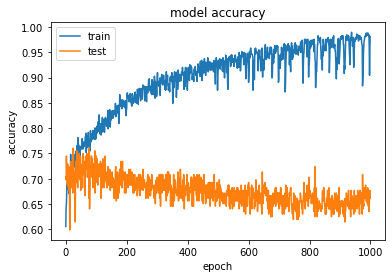

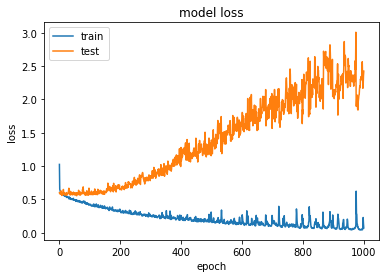

In [178]:
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [179]:
classifier_CNN = Sequential()
classifier_CNN.add(Conv2D(filters = 5 , kernel_size = (2,2), strides =(1,1) , padding = "same" ,activation= "relu" ,input_shape = (4,2,1) ))
classifier_CNN.add(Conv2D(filters = 32 , kernel_size = (2,2), strides =(1,1) , padding = "valid" ,activation= "relu" ))
classifier_CNN.add(Flatten())
classifier_CNN.add(Dense(100,activation= "relu"))
classifier_CNN.add(Dense(1, activation= "sigmoid"))
classifier_CNN.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 4, 2, 5)           25        
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 1, 32)          672       
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense_10 (Dense)            (None, 100)               9700      
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,498
Trainable params: 10,498
Non-trainable params: 0
_________________________________________________________________


In [180]:
X_train.shape

(576, 8)

In [181]:
X_train = np.array(X_train).reshape((576,4,2,1))
X_test = np.array(X_test).reshape((len(X_test),4,2,1))

In [182]:
classifier_CNN.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
history = classifier_CNN.fit(X_train , y_train , epochs =100 , batch_size=20,validation_data=(X_test , y_test))

Epoch 1/100
29/29 [==============================] - 1s 5ms/step - loss: 1.2217 - accuracy: 0.5833 - val_loss: 0.6807 - val_accuracy: 0.5938
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6250 - val_loss: 0.6120 - val_accuracy: 0.6927
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.6615 - val_loss: 0.6356 - val_accuracy: 0.6510
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6632 - val_loss: 0.6157 - val_accuracy: 0.6719
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6753 - val_loss: 0.7079 - val_accuracy: 0.6094
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6701 - val_loss: 0.6053 - val_accuracy: 0.6927
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.6528 - val_loss: 0.5893 - val_accuracy: 0.6719
Epoch 8/100
2

Epoch 59/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7656 - val_loss: 0.5850 - val_accuracy: 0.7604
Epoch 60/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7378 - val_loss: 0.5520 - val_accuracy: 0.7604
Epoch 61/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7812 - val_loss: 0.5952 - val_accuracy: 0.7188
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7500 - val_loss: 0.5857 - val_accuracy: 0.7396
Epoch 63/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7552 - val_loss: 0.7000 - val_accuracy: 0.6719
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7500 - val_loss: 0.5664 - val_accuracy: 0.7135
Epoch 65/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7882 - val_loss: 0.6276 - val_accuracy: 0.6823
Epoch 

In [183]:
classifier_CNN.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7656


[0.5799898505210876, 0.765625]

In [184]:
acc = classifier_CNN.evaluate(X_test, y_test)[1]
#scores1 = scores.append(acc)
scores.append(acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7656


In [185]:
#print(scores)
print(acc)

0.765625


<AxesSubplot:>

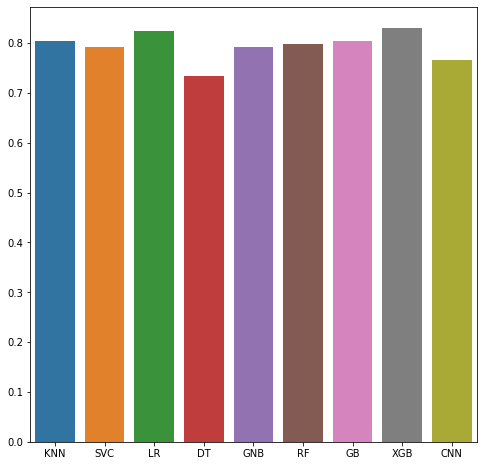

In [186]:
y=['KNN','SVC','LR','DT','GNB','RF','GB','XGB','CNN']
plt.figure(figsize= (8, 8))
sns.barplot(x= y , y = scores ,orient = 'v')


In [187]:
models


[{'label': 'LR', 'model': LogisticRegression()},
 {'label': 'GB', 'model': GradientBoostingClassifier()},
 {'label': 'GNB', 'model': GaussianNB()},
 {'label': 'KNN', 'model': KNeighborsClassifier()},
 {'label': 'RF', 'model': RandomForestClassifier()},
 {'label': 'DT', 'model': DecisionTreeClassifier()},
 {'label': 'SVC', 'model': SVC(probability=True)},
 {'label': 'XGB',
  'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=6,
                num_parallel_tree=1, predictor='auto', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact',

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


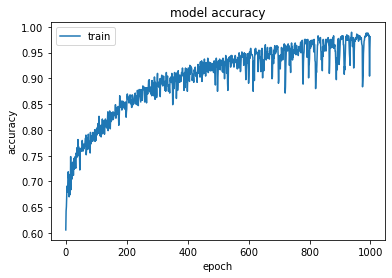

In [188]:
print(x.history.keys())
plt.plot(x.history['accuracy'])
#plt.plot(x.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
from keras import models, layers, losses, optimizers, metrics
from keras.models import Sequential
from keras import optimizers
import keras
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()

# Hyperparameters
hold_prob = 0.0
beta = 1e-6
alpha = 0.05
lr_decay = 0.01
iterations = 300
validation_split = 0.5
opt_momentum = 0.8 # (Use only for SGD)

# Optimizer
opt = optimizers.SGD(lr=alpha, decay=lr_decay, momentum=opt_momentum, nesterov=True)

# First Layer
model.add(layers.Dense(input_dim=8, units=8, activation='relu'))

# Hidden Layers
model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

#model.add(layers.Dense(units=12, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
#model.add(layers.Dropout(hold_prob))

# Output Layer
model.add(layers.Dense(units=2, activation='sigmoid'))

# Compiling the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train
#model.fit(x=scaled_x_train, y=y_train, epochs=iterations, validation_split=validation_split)
#x=model.fit(X_train, y_train, epochs=iterations, batch_size=10,validation_split=validation_split)
x=model.fit(X_train, y_train, epochs=iterations, batch_size=10,validation_data=(X_test, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [768, 9]

In [191]:
#fmon = FitMonitor()# optional
from keras.callbacks import ModelCheckpoint
# specify filepath- this will write a new file for each epoch with the epoch number contained within the filename
filepath="nn_weights-{epoch:02d}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', 
                                             save_weights_only=False, save_best_only=False, mode='max')

xModel=model.fit(X_train, y_train, epochs=100,verbose=0,batch_size=10,validation_data=(X_test, y_test),callbacks=[checkpoint],initial_epoch=10)

NameError: name 'keras' is not defined

In [192]:
print(xModel.history.keys())
# summarize history for accuracy


NameError: name 'xModel' is not defined